In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('/content/audio_features_basic.csv')

In [3]:
df1

,zcr_mean,spectral_centroid_mean,spectral_rolloff_mean,spectral_bandwidth_mean,rms_mean,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,...,mean_pitch,chroma_cqt_mean,spectral_flatness_mean,spectral_entropy,crest_factor,attack_time,decay_time,skewness,kurtosis,audio_label
0,0.001884,435.044963,261.246216,1847.156993,0.049349,-516.82780,152.228290,66.033615,41.339516,30.191803,...,99.772626,0.536816,0.000016,0.000014,3.155711,0.000000,4.990952,0.003245,-0.409441,off_state/Device1_2025-01-28_15-08-52.wav
1,0.002405,492.484711,388.946604,1895.632580,0.052205,-507.32578,152.829540,59.812790,40.615710,28.692520,...,107.791197,0.508785,0.000062,0.000015,3.100547,0.000000,4.992290,-0.006493,-0.396116,off_state/Device1_2025-01-28_15-18-00.wav
2,0.001946,433.238626,284.378172,1825.202550,0.051341,-515.54297,151.152590,70.068756,40.505783,29.610435,...,96.487842,0.510431,0.000034,0.000007,3.430911,0.000000,4.992290,-0.075463,-0.390354,off_state/Device1_2025-01-28_15-09-17.wav
3,0.002545,545.071008,374.158140,2046.570662,0.037027,-514.84300,158.891270,56.284767,43.182580,27.307533,...,94.254543,0.564577,0.000031,0.000037,3.362695,0.000000,4.992290,0.027892,-0.222186,off_state/Device1_2025-01-28_15-17-36.wav
4,0.002779,541.223084,370.710829,2039.290728,0.037111,-513.67426,156.398090,57.941628,41.444748,28.333006,...,92.507715,0.495371,0.000029,0.000039,3.572202,0.000000,4.992290,-0.037448,-0.166525,off_state/Device1_2025-01-28_15-17-34.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.156155,5504.493870,10361.817313,4610.127996,0.670470,100.33470,65.130585,-24.376926,48.179920,-7.966176,...,84.431331,0.495851,0.048204,0.000002,1.491491,0.000023,4.989320,-0.007277,-1.316607,paper_state/Device1_2025-01-28_15-02-20.wav
431,0.122064,4689.956414,9058.234167,4208.505302,0.655897,88.91745,84.571210,-47.899180,24.003063,-13.013366,...,78.032568,0.617428,0.038677,0.000013,1.524629,0.000136,4.963016,-0.018960,-1.250664,paper_state/Device1_2025-01-28_14-53-05.wav
432,0.097799,4166.064952,8201.402534,3993.808550,0.614033,58.03749,104.494150,-33.623820,40.537260,-8.080683,...,109.128697,0.616465,0.032002,0.000010,1.628578,0.000000,4.969887,0.008707,-1.106593,paper_state/Device1_2025-01-28_14-55-49.wav
433,0.131693,5186.132648,10223.924875,4605.678907,0.589515,78.00083,74.346380,-27.950022,39.160076,-9.714118,...,97.208273,0.524651,0.039505,0.000010,1.696309,0.000272,4.740363,0.015298,-1.010401,paper_state/Device1_2025-01-28_15-02-39.wav


In [4]:
df1.head()

,zcr_mean,spectral_centroid_mean,spectral_rolloff_mean,spectral_bandwidth_mean,rms_mean,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,...,mean_pitch,chroma_cqt_mean,spectral_flatness_mean,spectral_entropy,crest_factor,attack_time,decay_time,skewness,kurtosis,audio_label
0,0.001884,435.044963,261.246216,1847.156993,0.049349,-516.82780,152.22829,66.033615,41.339516,30.191803,...,99.772626,0.536816,0.000016,0.000014,3.155711,0.0,4.990952,0.003245,-0.409441,off_state/Device1_2025-01-28_15-08-52.wav
1,0.002405,492.484711,388.946604,1895.632580,0.052205,-507.32578,152.82954,59.812790,40.615710,28.692520,...,107.791197,0.508785,0.000062,0.000015,3.100547,0.0,4.992290,-0.006493,-0.396116,off_state/Device1_2025-01-28_15-18-00.wav
2,0.001946,433.238626,284.378172,1825.202550,0.051341,-515.54297,151.15259,70.068756,40.505783,29.610435,...,96.487842,0.510431,0.000034,0.000007,3.430911,0.0,4.992290,-0.075463,-0.390354,off_state/Device1_2025-01-28_15-09-17.wav
3,0.002545,545.071008,374.158140,2046.570662,0.037027,-514.84300,158.89127,56.284767,43.182580,27.307533,...,94.254543,0.564577,0.000031,0.000037,3.362695,0.0,4.992290,0.027892,-0.222186,off_state/Device1_2025-01-28_15-17-36.wav
4,0.002779,541.223084,370.710829,2039.290728,0.037111,-513.67426,156.39809,57.941628,41.444748,28.333006,...,92.507715,0.495371,0.000029,0.000039,3.572202,0.0,4.992290,-0.037448,-0.166525,off_state/Device1_2025-01-28_15-17-34.wav


In [5]:
df1.describe()

,zcr_mean,spectral_centroid_mean,spectral_rolloff_mean,spectral_bandwidth_mean,rms_mean,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,...,percussive_rms,mean_pitch,chroma_cqt_mean,spectral_flatness_mean,spectral_entropy,crest_factor,attack_time,decay_time,skewness,kurtosis
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,425.000000,435.000000,435.000000,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.080355,3217.172566,6080.018230,3357.095985,0.499284,-102.496232,115.427728,-3.145312,47.035851,9.398897,...,0.175375,276.143062,0.583394,0.033728,8.617618e-06,2.115329,0.023243,4.965471,0.003479,-0.961518
std,0.077644,2430.089617,4669.708076,1215.258926,0.281073,252.480051,57.519508,41.268328,11.244926,12.853250,...,0.107231,344.122233,0.058561,0.040452,9.361670e-06,1.020657,0.100005,0.148879,0.045886,0.634980
min,0.001404,395.109705,238.463987,1750.581984,0.033030,-521.987700,14.218310,-52.110657,24.003063,-18.293026,...,0.003983,65.406391,0.356166,0.000012,9.535440e-08,1.183811,0.000000,2.958413,-0.169087,-1.751980
25%,0.002680,570.217242,471.482222,2071.387847,0.052711,-500.570000,55.818782,-29.354697,39.360380,1.541551,...,0.004468,83.022925,0.535380,0.000055,3.684955e-07,1.453712,0.000000,4.990884,-0.025173,-1.375158
50%,0.022784,1657.822344,3697.765575,2636.607891,0.623122,-31.327087,147.417740,-24.578430,42.140724,6.069524,...,0.209842,95.566388,0.588516,0.000413,6.197232e-06,1.604821,0.000091,4.992200,0.002576,-1.177242
75%,0.160262,5781.919629,10897.649339,4657.472827,0.687896,99.553710,178.147835,55.927207,62.089616,27.057118,...,0.251147,320.848801,0.627408,0.071238,1.290760e-05,3.174144,0.001519,4.992290,0.037178,-0.466055
max,0.236454,7180.219438,13020.893113,5063.096706,0.844729,133.339830,183.692460,73.079390,64.889435,32.290024,...,0.368072,1497.202110,0.742091,0.124066,5.314631e-05,6.819038,1.008027,4.992290,0.249750,3.653683


In [6]:
df1.isnull().sum()

,0
zcr_mean,0
spectral_centroid_mean,0
spectral_rolloff_mean,0
spectral_bandwidth_mean,0
rms_mean,0
mfcc_1_mean,0
mfcc_2_mean,0
mfcc_3_mean,0
mfcc_4_mean,0
mfcc_5_mean,0


In [7]:
df1.dtypes

,0
zcr_mean,float64
spectral_centroid_mean,float64
spectral_rolloff_mean,float64
spectral_bandwidth_mean,float64
rms_mean,float64
mfcc_1_mean,float64
mfcc_2_mean,float64
mfcc_3_mean,float64
mfcc_4_mean,float64
mfcc_5_mean,float64


In [8]:
# Creating an imputer instance
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Reshaping and imputing
df1['mean_pitch'] = imputer.fit_transform(df1[['mean_pitch']])

print(df1['mean_pitch'].isnull().sum())

0


In [9]:
df1.shape

(435, 34)

In [10]:
print("Duplicate Values =",df1.duplicated().sum())


Duplicate Values = 0


Feature Importances:
                     Feature  Importance
24               mean_pitch    0.037253
8               mfcc_4_mean    0.036162
17             mfcc_13_mean    0.035079
20             tonnetz_mean    0.034878
18              chroma_mean    0.034339
16             mfcc_12_mean    0.033257
27         spectral_entropy    0.033122
31                 skewness    0.032727
12              mfcc_8_mean    0.032712
6               mfcc_2_mean    0.032373
23           percussive_rms    0.031854
11              mfcc_7_mean    0.031725
25          chroma_cqt_mean    0.031617
13              mfcc_9_mean    0.031594
9               mfcc_5_mean    0.031544
21      onset_strength_mean    0.031338
19   spectral_contrast_mean    0.031271
5               mfcc_1_mean    0.030700
15             mfcc_11_mean    0.030556
14             mfcc_10_mean    0.030543
10              mfcc_6_mean    0.029421
7               mfcc_3_mean    0.028792
28             crest_factor    0.028493
4                 

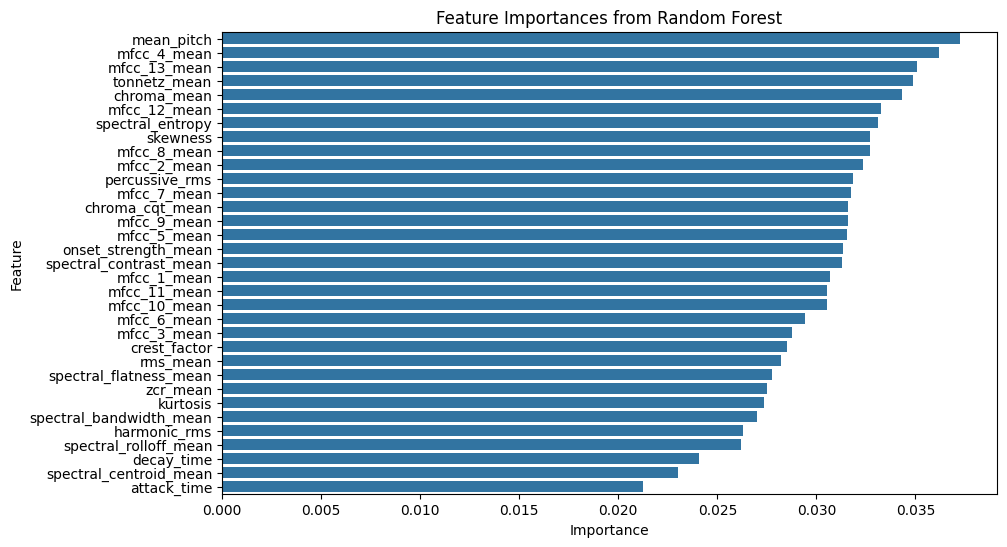

In [11]:

# Assuming 'target' is the target column
X = df1.drop(columns=['audio_label'])
y = df1['audio_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df1 = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df1)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df1)
plt.title('Feature Importances from Random Forest')
plt.show()

In [12]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(importance_df.head(15))


             Feature  Importance
24        mean_pitch    0.037253
8        mfcc_4_mean    0.036162
17      mfcc_13_mean    0.035079
20      tonnetz_mean    0.034878
18       chroma_mean    0.034339
16      mfcc_12_mean    0.033257
27  spectral_entropy    0.033122
31          skewness    0.032727
12       mfcc_8_mean    0.032712
6        mfcc_2_mean    0.032373
23    percussive_rms    0.031854
11       mfcc_7_mean    0.031725
25   chroma_cqt_mean    0.031617
13       mfcc_9_mean    0.031594
9        mfcc_5_mean    0.031544


Index(['mean_pitch', 'mfcc_4_mean', 'mfcc_13_mean', 'tonnetz_mean',
       'chroma_mean', 'mfcc_12_mean', 'spectral_entropy', 'skewness',
       'mfcc_8_mean', 'mfcc_2_mean', 'percussive_rms', 'mfcc_7_mean',
       'chroma_cqt_mean', 'mfcc_9_mean', 'mfcc_5_mean'],
      dtype='object')


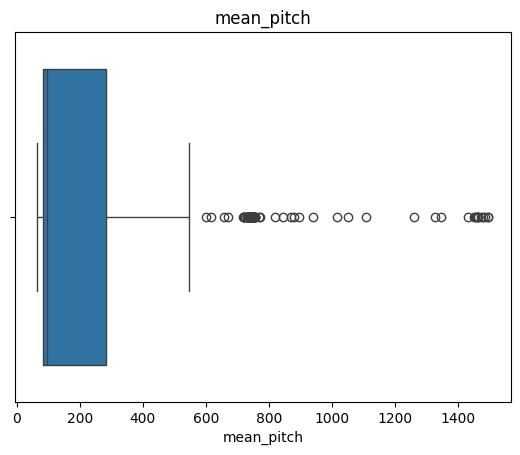

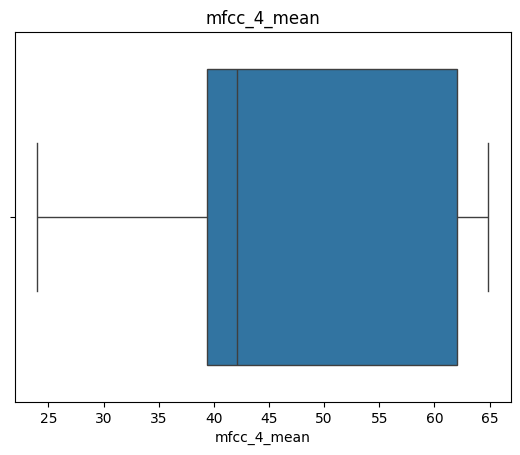

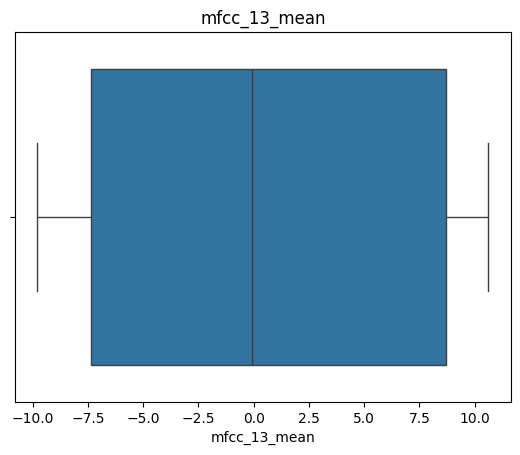

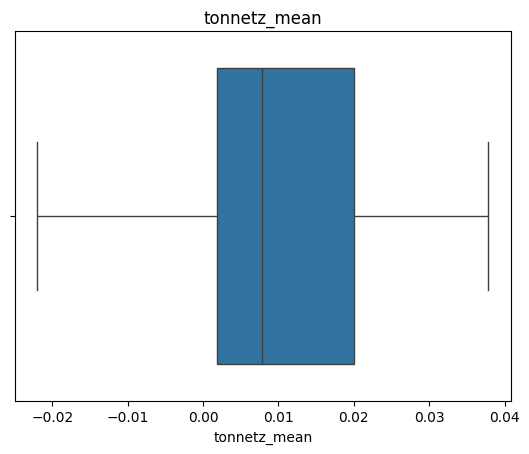

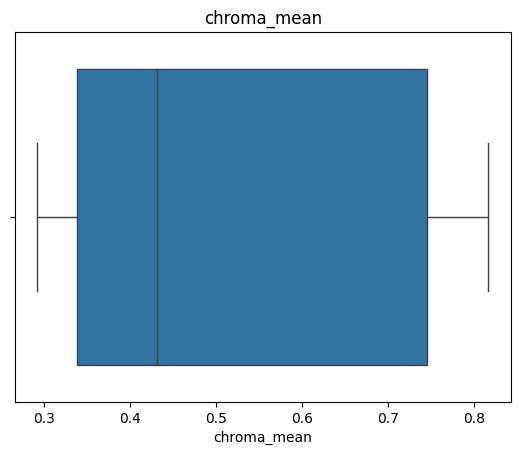

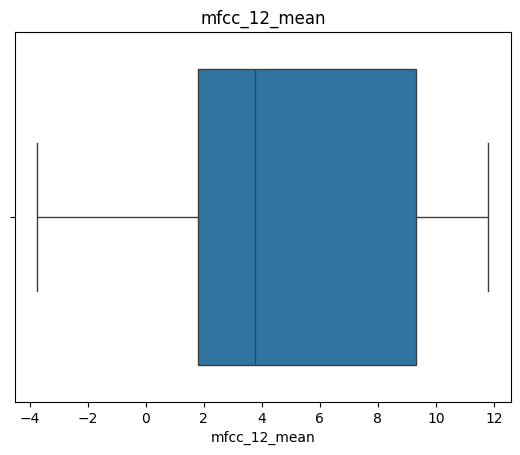

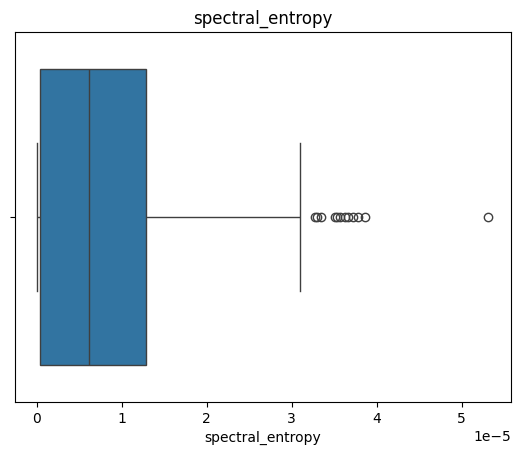

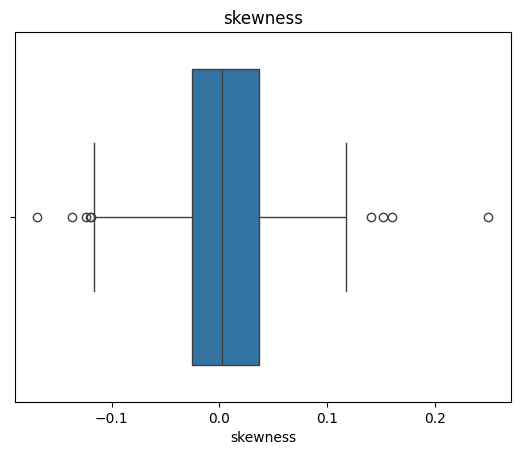

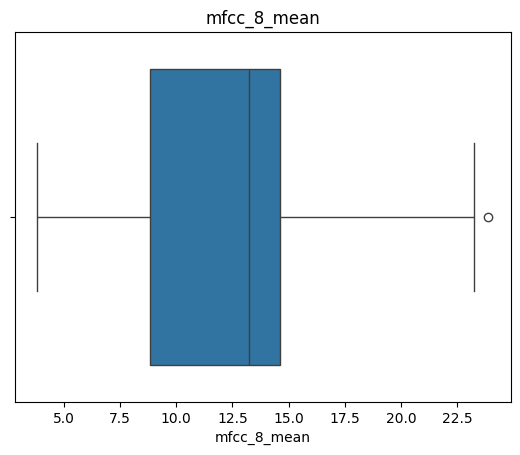

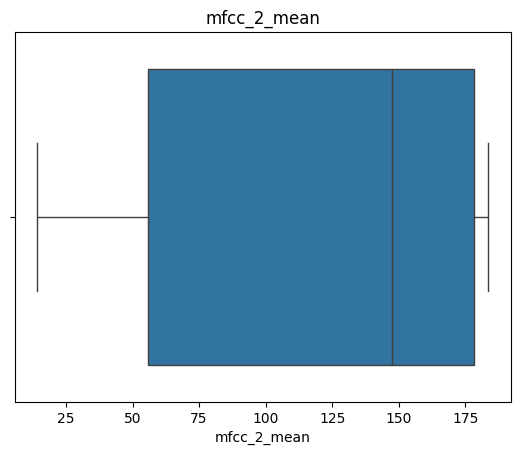

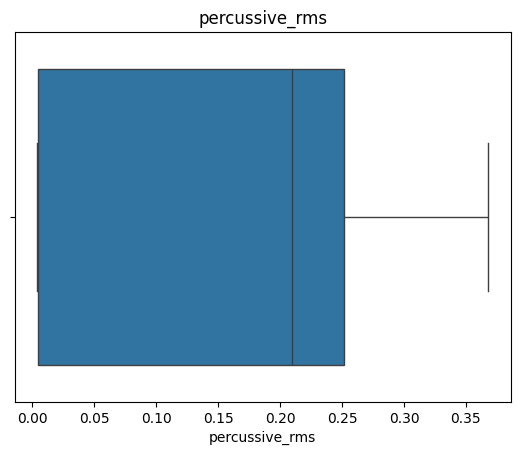

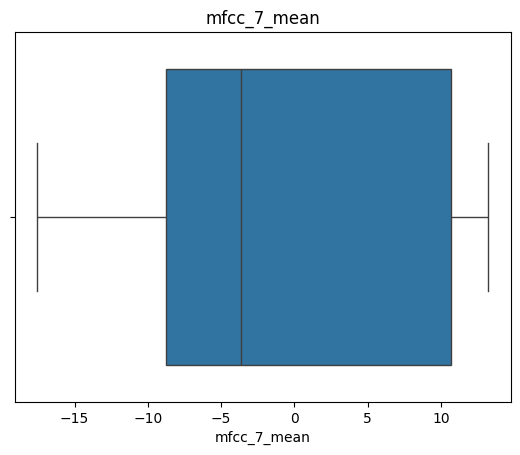

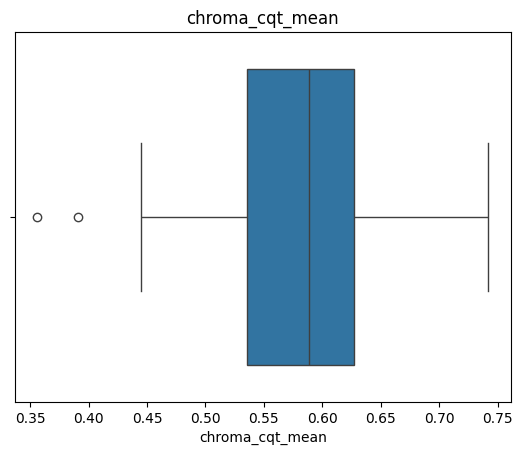

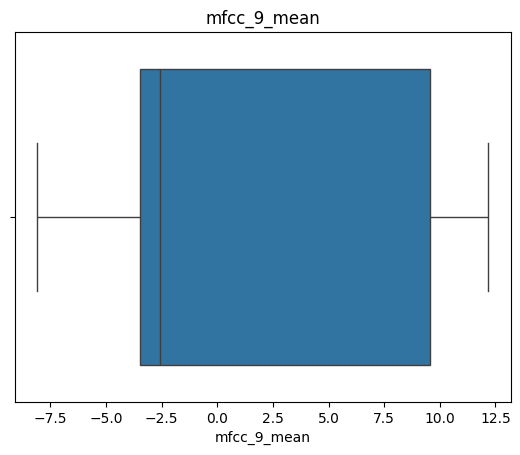

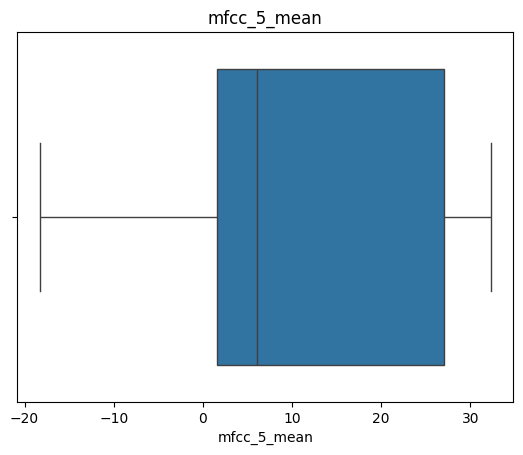

In [16]:

# Select the top N important features (e.g., top 15)
top_features = importance_df['Feature'].head(15)

# Create a new DataFrame with only the top features
X_top_features = X[top_features]

col=X_top_features.columns[:15]
print(col)
for j in col:
    sns.boxplot(data=X_top_features[j],orient='h')
    plt.title(j)
    plt.show()

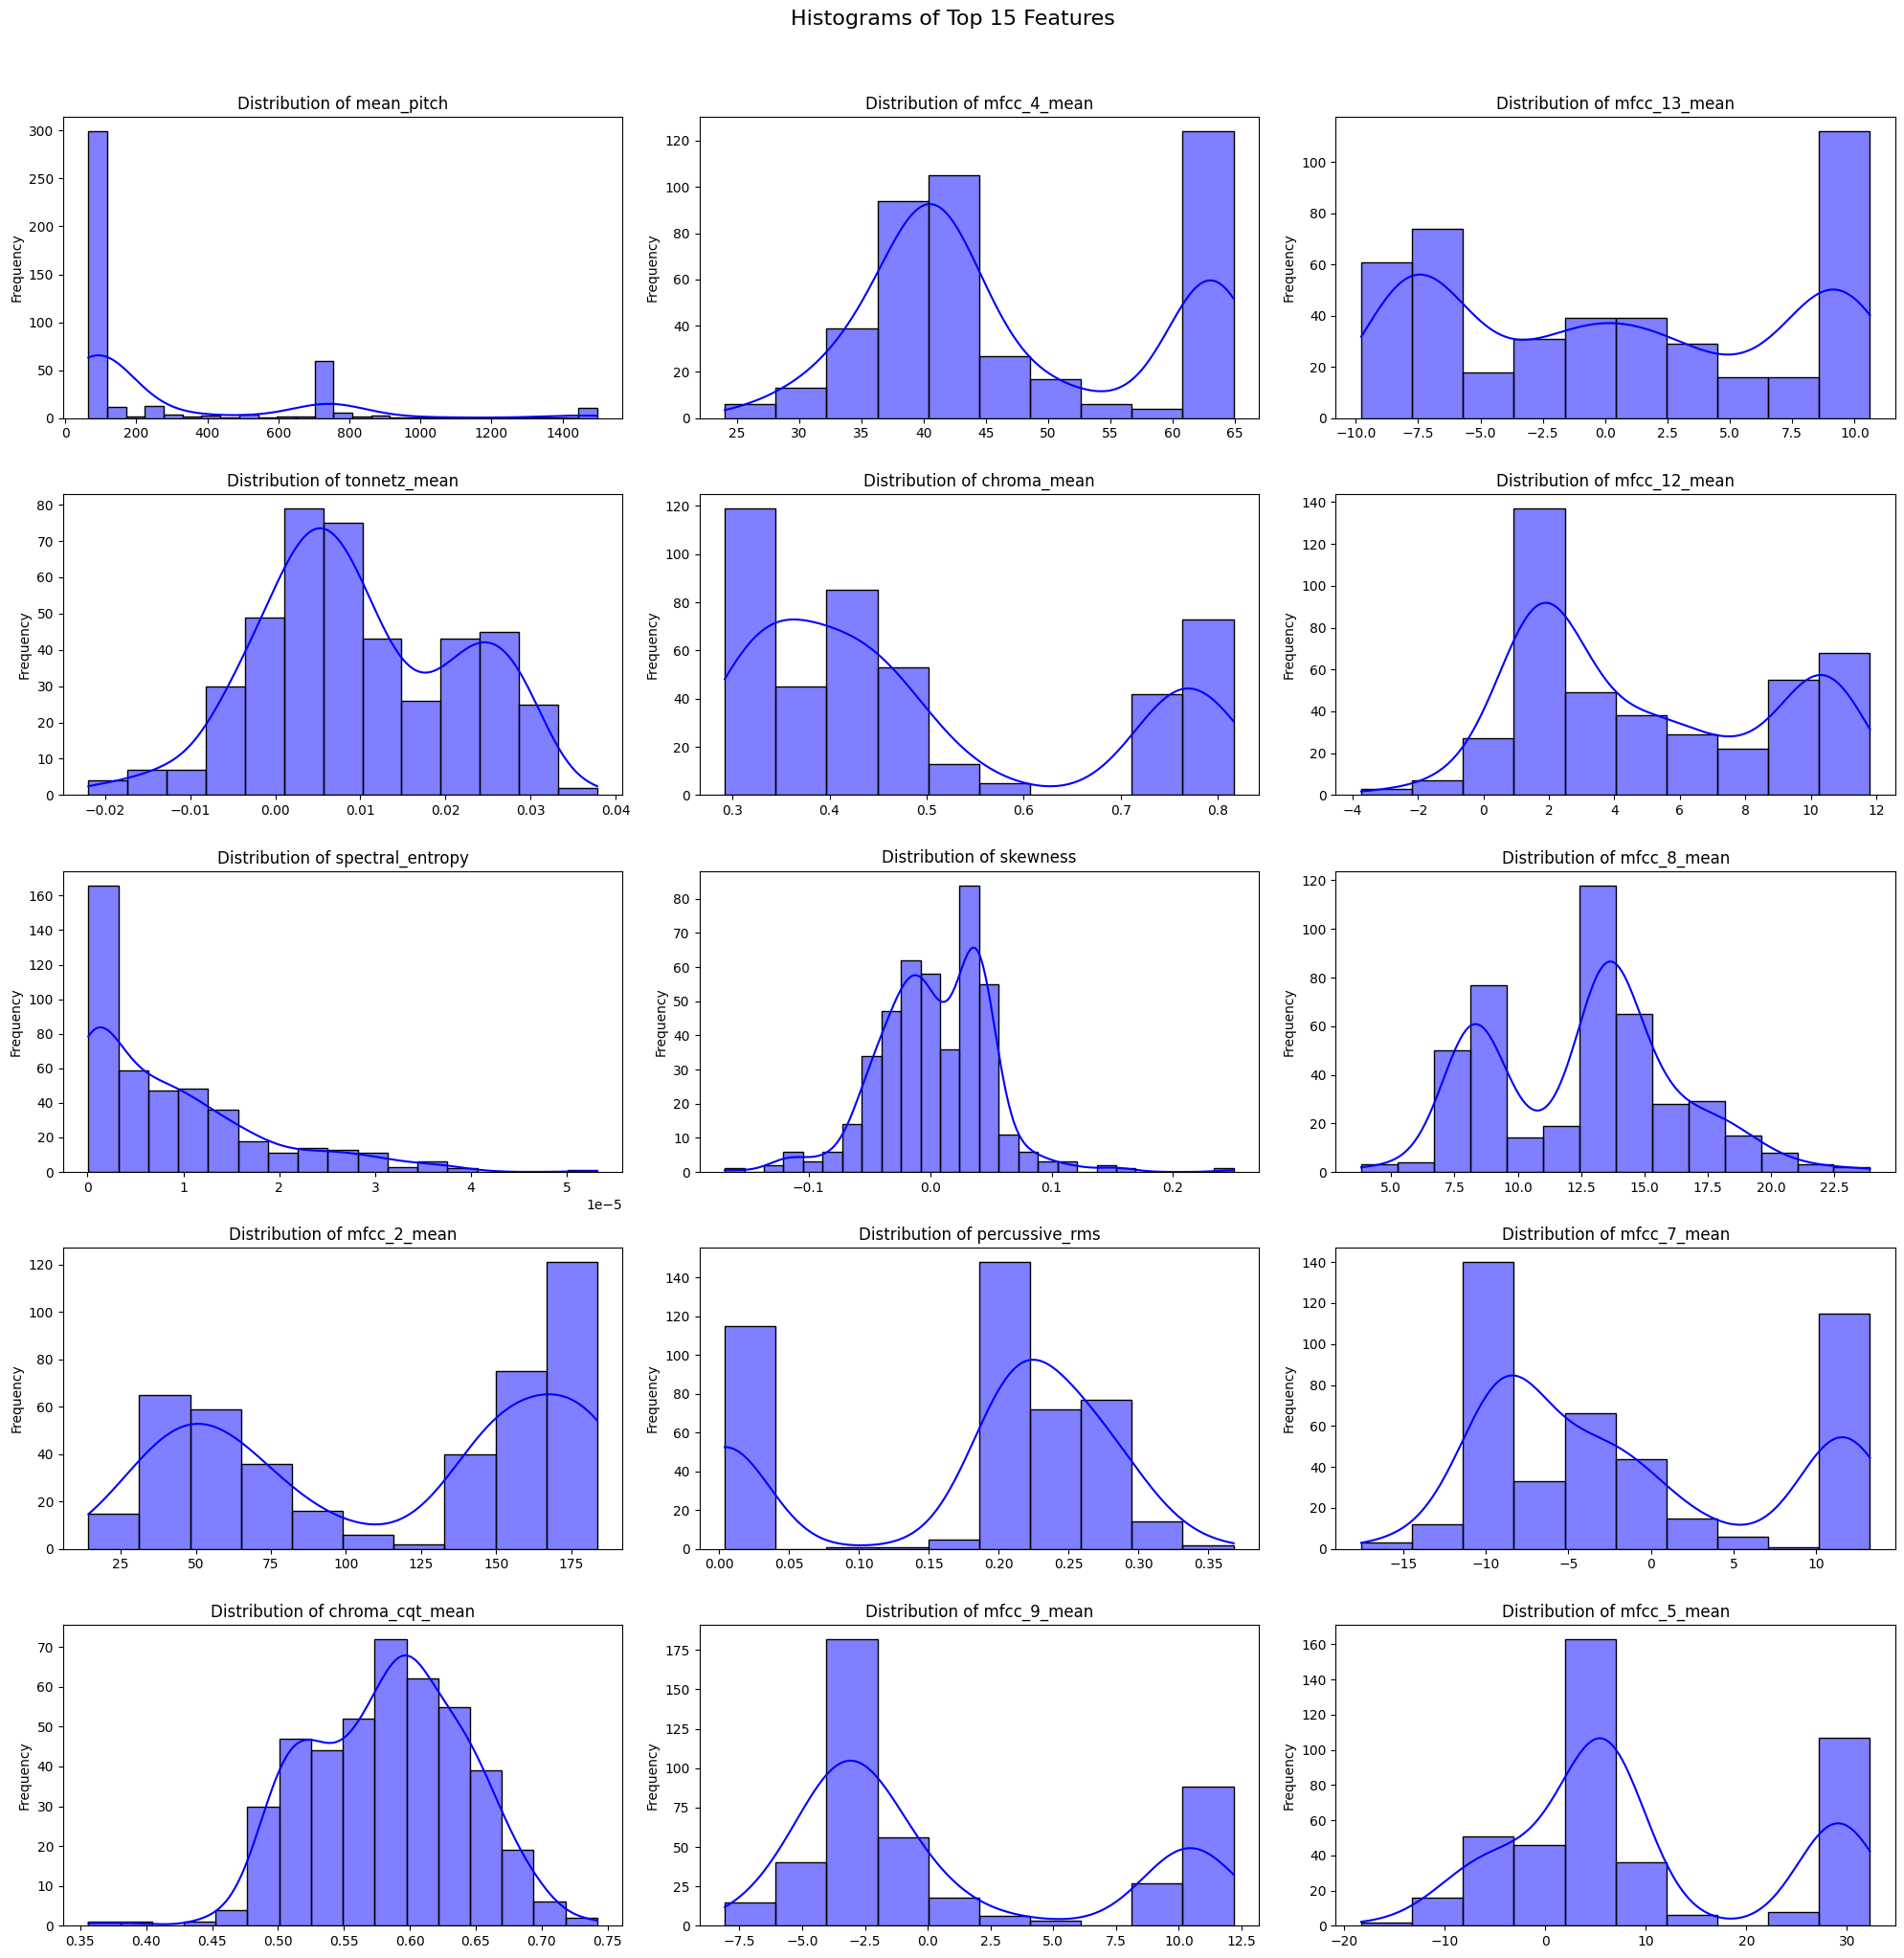

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the subplot grid
fig, axes = plt.subplots(5, 3, figsize=(20, 20))  # 5 rows, 3 columns
fig.suptitle('Histograms of Top 15 Features', fontsize=16, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(X_top_features):
    sns.histplot(X[feature], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

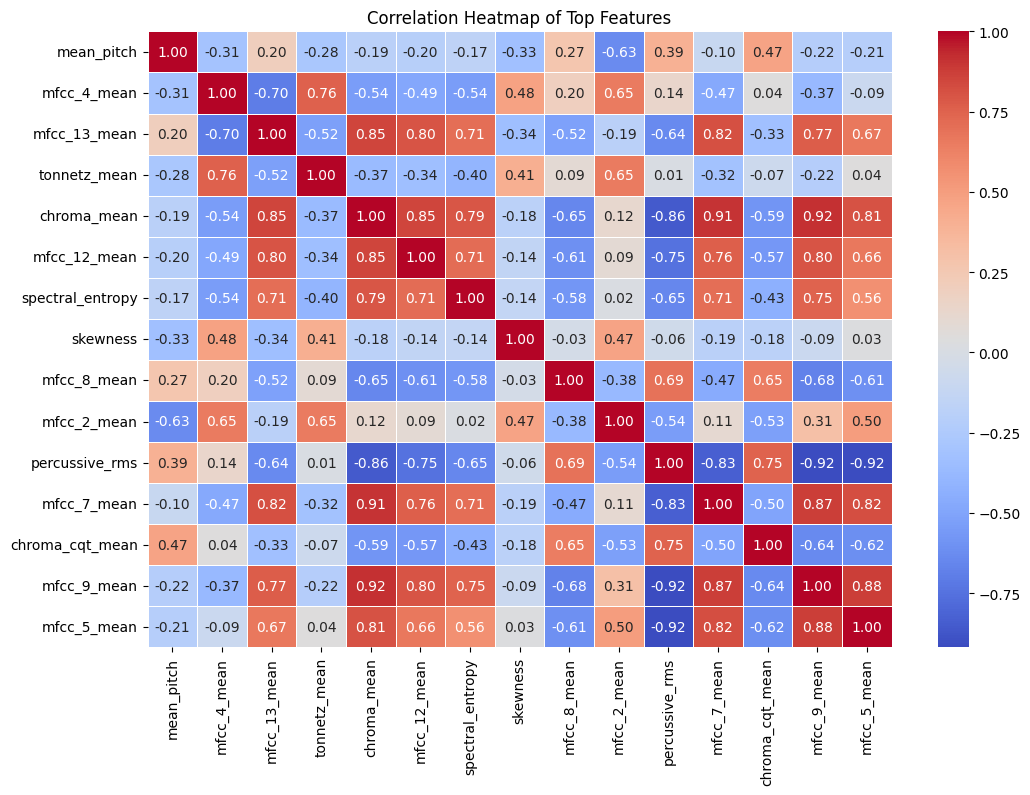

In [17]:

# Calculate the correlation matrix for the top features
corr_matrix = X_top_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Top Features')
plt.show()
